# Методы оптимизации. Задание 4. Фабарисов Дмитрий.

In [1]:
import numpy as np
from scipy import optimize as opt
import matplotlib.pyplot as plt
import itertools

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Напишем функцию вычисления минимума методом внутренней точки.

f0 - исходная функция

f - уравнения ограничения

nu - $\mu$ - шаг увеличения t

eps - нижняя граница для $\frac{m}{t}$

In [2]:
def interior_point(f0, grad_f0, f, grad_f, x0, nu=2, eps=1e-6):
    
    def cur_f(x):
        return t*f0(x) - np.sum([np.log(f1(x)) for f1 in f])
    def cur_grad(x):
        return t*grad_f0(x) - np.sum([grad_f1(x) / f1(x) for f1, grad_f1 in zip(f, grad_f)], axis=0)
    t = 1
    x = x0
    iter_history = []
    while len(f) > eps * t:
        res = opt.fmin(cur_f, x, full_output=True, disp=False)
        x = res[0]
        iter_history.append(res[2])
        t *= nu
    return x, np.array(iter_history)

## Задаем данные, функции, градиенты

In [3]:
n = 10

f0 = lambda x: -np.sum([10**(n-j) * x[j] for j in range(len(x))]) 
grad_f0 = lambda x: -np.array([10**(n-j) for j in range(len(x))])

f = [lambda x, z=i: 100**z - 2*np.sum([10**(z - j)*x[j] for j in range(z)]) - x[z] for i in range(n)]
f += [lambda x, z=k: x[z] for k in range(n)]

grad_f = [lambda x, z=i: -2*np.array([10**(z - j) for j in range(z)] + [0.0]*(n-z)) for i in range(n)] 
grad_f += [lambda x, z=i: np.eye(n)[z] for k in range(n)]

## Вспомогательные функции для построения графиков

In [4]:
def get_y(iter_history):
    y = [[np.log(m*1.0/1.5**k)]*iter_history[k] for k in range(len(iter_history))]
    y_chain = list(itertools.chain(*y))
    return y_chain

In [12]:
def draw_nu_plot(y_chains, nu):
    fig, axes = plt.subplots(5, 2, figsize=(20, 25))
    for i in range(5):
        axes[i, 0].plot(range(len(y_chains[i])), y_chains[i])
        axes[i, 0].set_title('nu = {:.4}'.format(nu[i]))
        axes[i, 1].plot(range(len(y_chains[5 + i])), y_chains[5 + i])
        axes[i, 1].set_title('nu = {:.4}'.format(nu[5 + i]))

In [16]:
def draw_n_plot(y_chains, dif_n):
    fig, axes = plt.subplots(5, 2, figsize=(20, 25))
    for i in range(5):
        axes[i, 0].plot(range(len(y_chains[i])), y_chains[i])
        axes[i, 0].set_title('n = {}'.format(dif_n[i]))
        axes[i, 1].plot(range(len(y_chains[5 + i])), y_chains[5 + i])
        axes[i, 1].set_title('n = {}'.format(dif_n[5 + i]))

## Графики для различных $\mu$:

In [10]:
nu = np.linspace(1.1, 100, 10)
y_chains = list()
x0 = [0.5]*n
for item in nu:
    x, iter_history = interior_point(f0, grad_f0, f, grad_f, x0, nu=item, eps=1e-8)
    y_chains.append(get_y(iter_history))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


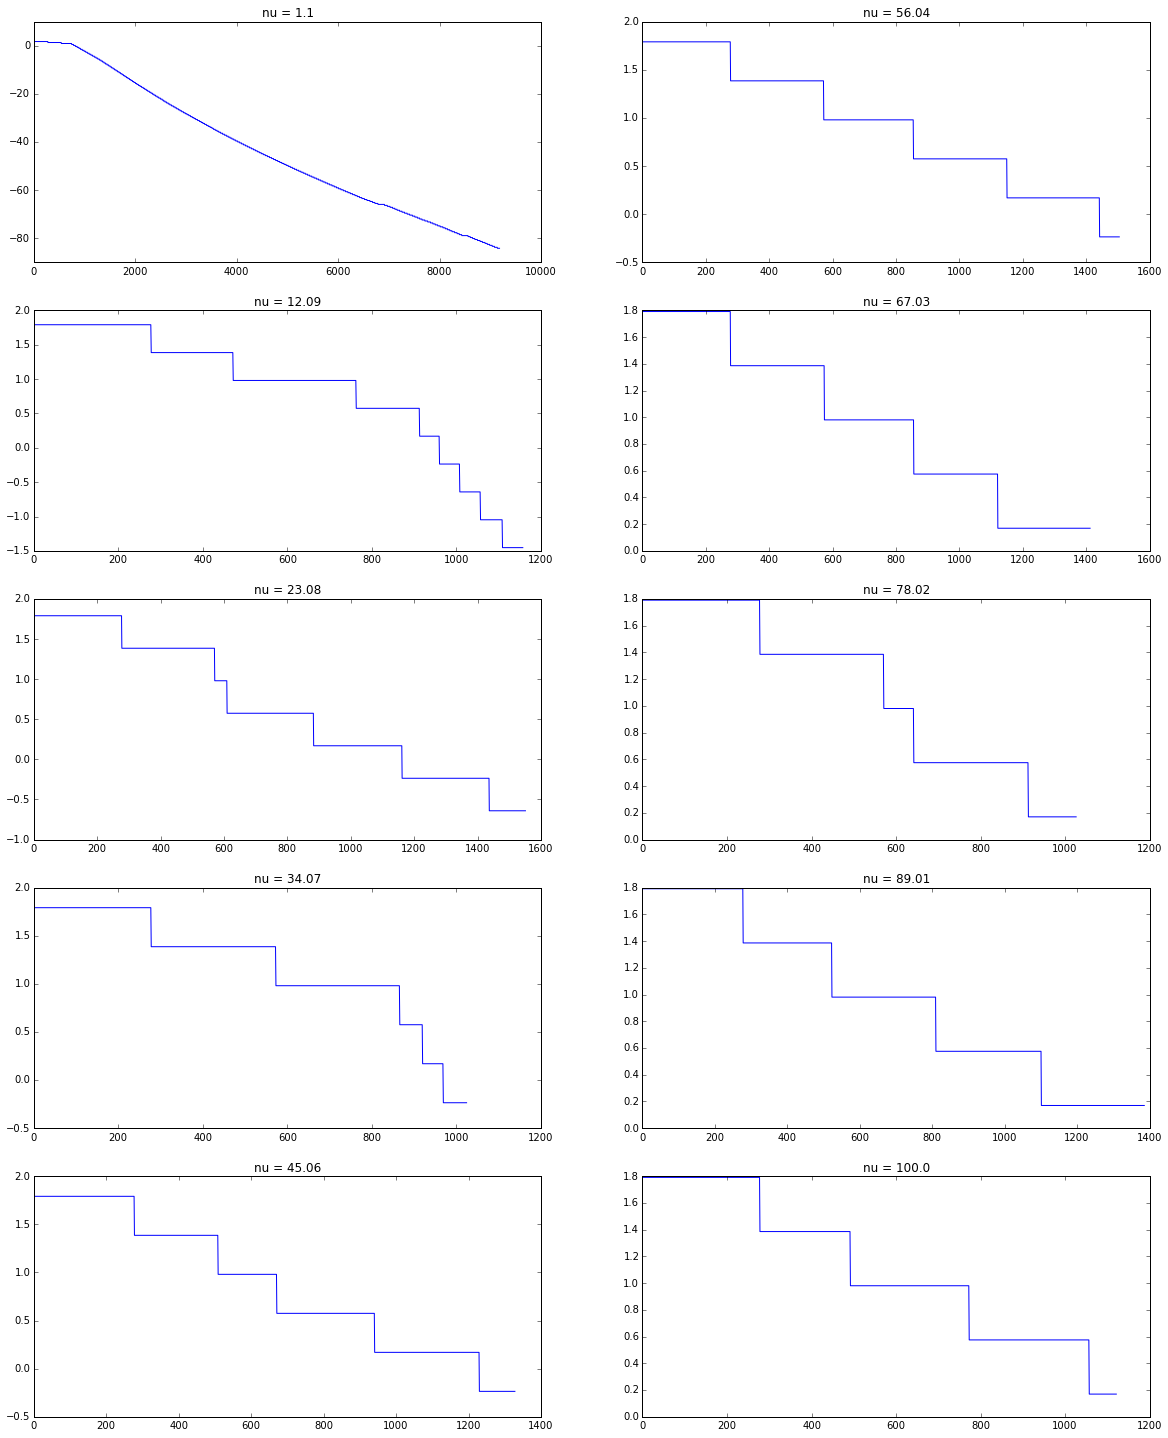

In [13]:
draw_nu_plot(y_chains, nu)

## Графики для разных размерностей

In [14]:
y_chains = list()
dif_n = range(2, 101)[::10]
for n in dif_n:
    print n
    x0 = [0.5]*n
    
    f0 = lambda x: -np.sum([10**(n-j) * x[j] for j in range(len(x))]) 
    grad_f0 = lambda x: -np.array([10**(n-j) for j in range(len(x))])

    f = [lambda x, z=i: 100**z - 2*np.sum([10**(z - j)*x[j] for j in range(z)]) - x[z] for i in range(n)]
    f += [lambda x, z=k: x[z] for k in range(n)]

    grad_f = [lambda x, z=i: -2*np.array([10**(z - j) for j in range(z)] + [0.0]*(n-z)) for i in range(n)] 
    grad_f += [lambda x, z=i: np.eye(n)[z] for k in range(n)]
    
    x, iter_history = interior_point(f0, grad_f0, f, grad_f, x0, nu=10, eps=1e-8)
    y_chains.append(get_y(iter_history))

2
12

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log



22
32
42
52
62
72
82
92


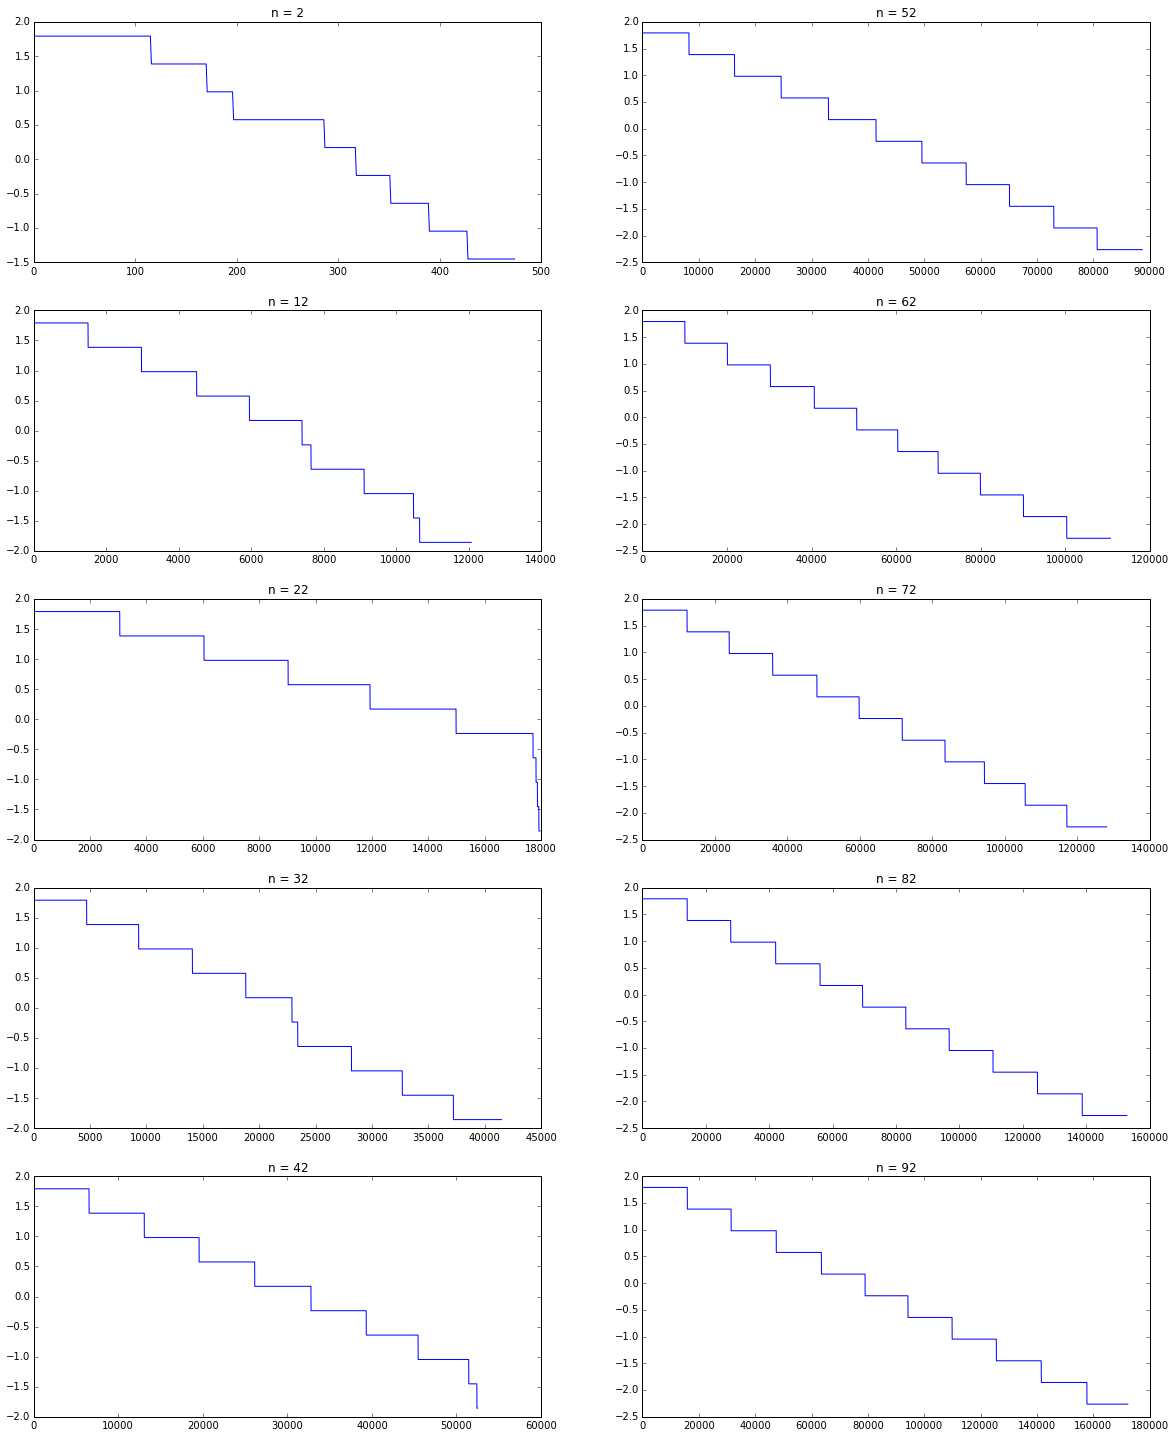

In [17]:
draw_n_plot(y_chains, dif_n)

## Полуопределенное программирование

In [24]:
def interior_point2(f0, A0, A, x0, nu=2, eps=1e-6):
    t = 1
    def cur_f(x):
        cur_A = A0.copy()
        for i in range(len(x)):
            cur_A += x[i] * A[i]
        eigs = np.linalg.eigvals(cur_A)
        return t * f0(x) - np.sum([np.log(-eig) for eig in eigs])
    x = x0
    iter_history = []
    while len(f) / t > eps:
        res = opt.fmin(cur_f, x, full_output=True, disp=False)
        x = res[0]
        iter_history.append(res[2])
        t *= nu
    return x, np.array(iter_history)

## Далее подготовим данные и нарисуем графики.

In [19]:
m = 10
n = 10
M = 2*np.random.random((m, m)) - np.ones((m, m))
A0 = -M.dot(M.T) - np.eye(m)
A = list()
for i in range(n):
    M = 2*np.random.random((m/2, m/2)) - np.ones((m/2, m/2))
    M = M + M.T
    A.append(np.array(np.bmat([[M, np.zeros((m/2, m/2))], [np.zeros((m/2, m/2)), -M]])))

In [20]:
def f02(x):
    return x[-1]

In [31]:
nus = np.linspace(1.5, 100, 10)
y_chains2 = list()
for nu in nus:
    x, iter_history = interior_point2(f02, A0, A, [0.0]*n, nu, eps=1e-10)
    y_chains2.append(get_y(iter_history))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log


## Т.к. вторая часть считалась окол

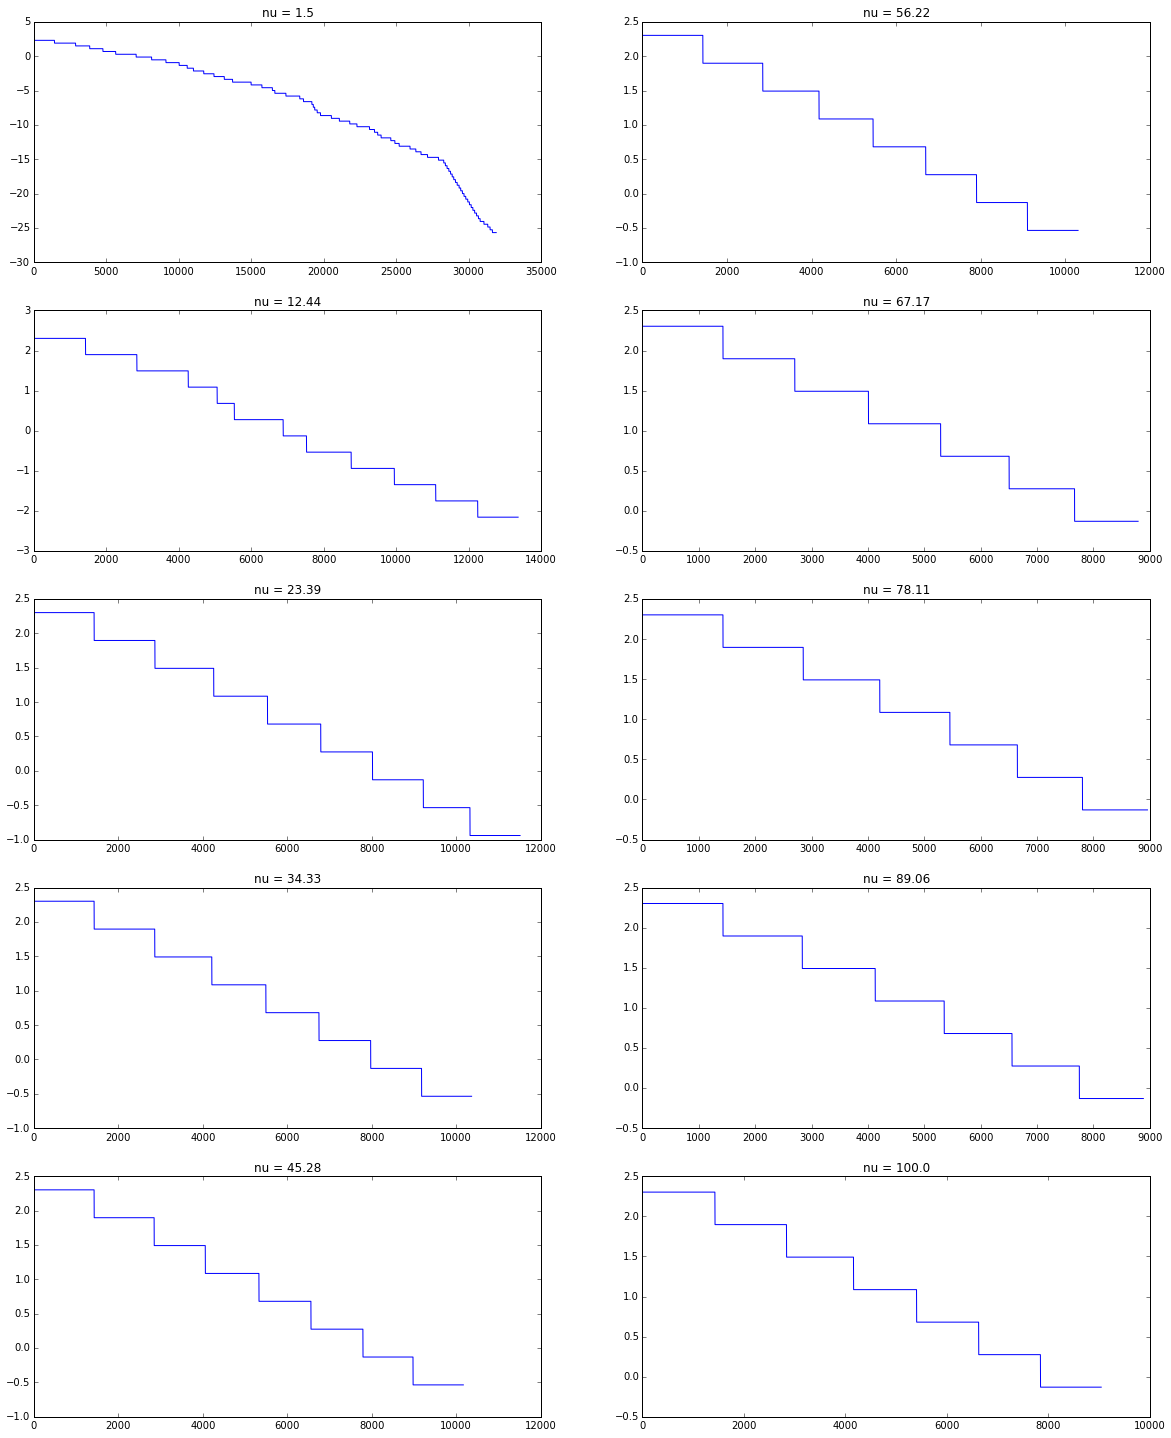

In [33]:
draw_nu_plot(y_chains2, nus)